In [6]:
import numpy as np

In [7]:
def calculate_one_off_accuracy(confusion_matrix):
    one_off_correct = 0
    total_samples = np.sum(confusion_matrix)

    # Iterate through the confusion matrix
    for i in range(len(confusion_matrix)):
        # Main diagonal
        one_off_correct += confusion_matrix[i][i]

        # Adjacent diagonals
        if i > 0:
            one_off_correct += confusion_matrix[i][i - 1]  # Element on the left
        if i < len(confusion_matrix) - 1:
            one_off_correct += confusion_matrix[i][i + 1]  # Element on the right

    one_off_accuracy = one_off_correct / total_samples
    return one_off_accuracy

In [18]:
def print_stats(cm):
    TP = np.diag(cm)
    FP = np.sum(cm, axis=0) - TP
    FN = np.sum(cm, axis=1) - TP
    TN = np.sum(cm) - (TP + FP + FN)

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = 2 * (precision * recall) / (precision + recall)

    # Calculate class weights
    class_weights = np.sum(cm, axis=1) / np.sum(cm)

    # Calculate weighted Precision, Recall, and F1-score
    weighted_precision = np.sum(precision * class_weights)
    weighted_recall = np.sum(recall * class_weights)
    weighted_f1_score = np.sum(f1 * class_weights)

    # Calculate accuracies
    accuracy = np.sum(np.diag(cm)) / np.sum(cm)
    one_off_accuracy = calculate_one_off_accuracy(cm)

    # Print results
    print("Accuracy on test:", accuracy)
    print("Weighted Precision:", weighted_precision)
    print("Weighted Recall:", weighted_recall)
    print("Weighted F1-score:", weighted_f1_score)
    print('One-off Accuracy:', one_off_accuracy)

In [21]:
CNN_names = ['FaceNet', 'FaceNet_Casia', 'ResNet9_128', 'ResNet50_Dropout']

for filename in CNN_names:
    cm = np.load(f'./CNNs/{filename}/confusion_matrix_test.npy')
    print(f'Results for {filename}:')
    print_stats(cm)
    print('\n')

Results for FaceNet:
Accuracy on test: 0.6397318935021411
Weighted Precision: 0.6406381212387552
Weighted Recall: 0.6397318935021411
Weighted F1-score: 0.636265290012686
One-off Accuracy: 0.9692794637870042


Results for FaceNet_Casia:
Accuracy on test: 0.6265127536771551
Weighted Precision: 0.6290209302426077
Weighted Recall: 0.6265127536771551
Weighted F1-score: 0.6240212526521016
One-off Accuracy: 0.9733755352820703


Results for ResNet9_128:
Accuracy on test: 0.5671197169986967
Weighted Precision: 0.5685869113938942
Weighted Recall: 0.5671197169986967
Weighted F1-score: 0.553107679650879
One-off Accuracy: 0.9603425805250418


Results for ResNet50_Dropout:
Accuracy on test: 0.6073356916775274
Weighted Precision: 0.607418298739564
Weighted Recall: 0.6073356916775275
Weighted F1-score: 0.6064124526889648
One-off Accuracy: 0.9648110221560231




In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
classes = ['6-15', '16-25', '26-35', '36-50', '51-65', '66-120']

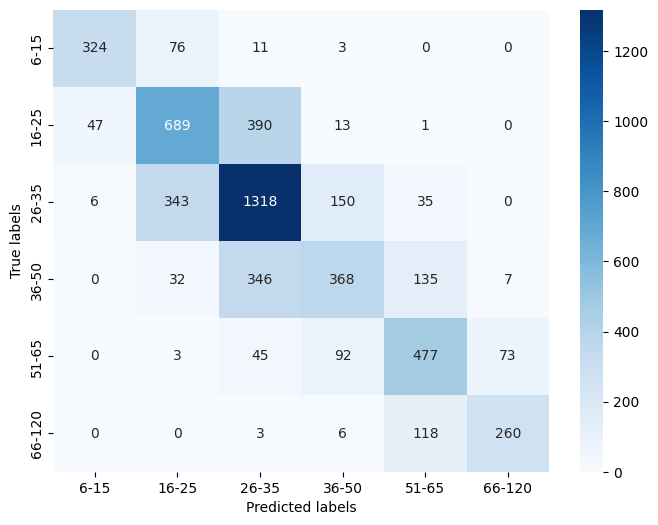

In [26]:
cm = np.load(f'./CNNs/FaceNet/confusion_matrix_test.npy')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.savefig('confusion_matrix_nn.pdf', format='pdf')
plt.show()